/var/folders/6j/6yws0gl51_d9_70tf51jrx5h0000gr/T/ipykernel_46974/39406539.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot1 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1)
/var/folders/6j/6yws0gl51_d9_70tf51jrx5h0000gr/T/ipykernel_46974/39406539.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot2 = plt.subplot2grid((3, 2), (0, 1), rowspan=1, colspan=1)
/var/folders/6j/6yws0gl51_d9_70tf51jrx5h0000gr/T/ipykernel_46974/39406539.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot3 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
/var/folders/6j/6yws0gl51_d9_70tf51jrx5h0000gr/

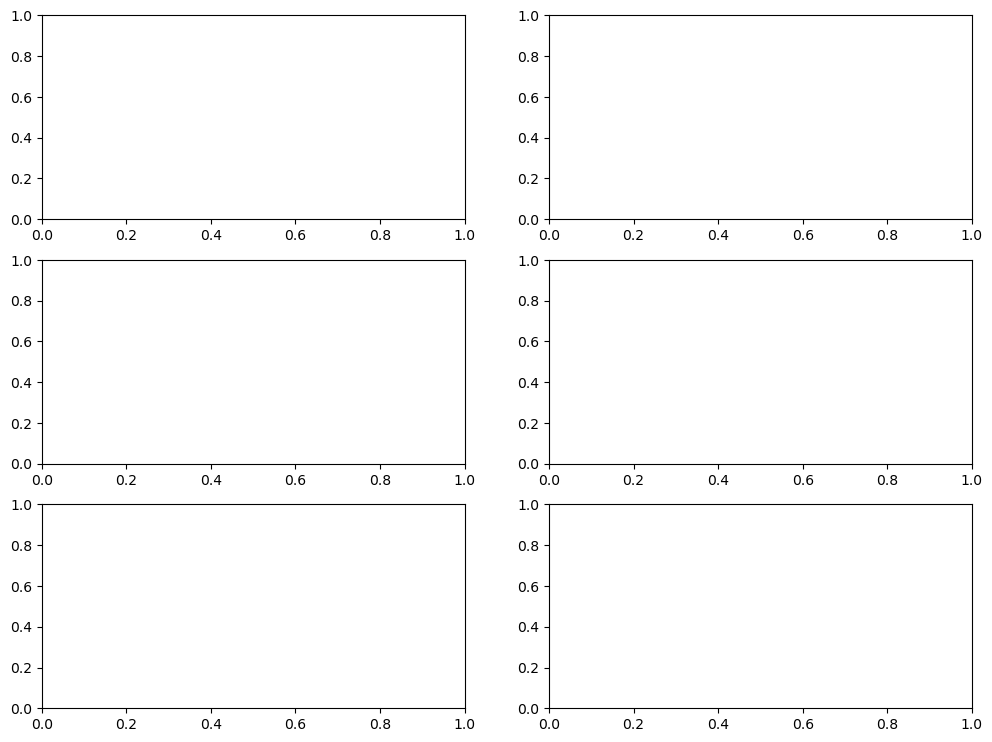

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import P201_Functions as p201

plt.rcParams["figure.figsize"] = (12,9)

figure, axis = plt.subplots(3, 2)
plot1 = plt.subplot2grid((3, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((3, 2), (0, 1), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 2), (1, 0), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((3, 2), (1, 1), rowspan=1, colspan=1)
plot5 = plt.subplot2grid((3, 2), (2, 0), rowspan=1, colspan=1)

In [2]:
def analyze_this(myfile,plot1):
    # Reads the name of the csv file and get the data
    df1 = pd.read_csv(myfile)
    # Prints information about the file
    df1.info()

    # Some trickery to get the data into 1D numpy arrays for plotting/fitting purposes.
    conv_arr1= df1.values

    time1 = np.delete(conv_arr1,[0,2,3,4],axis=1) 
    state1 = np.delete(conv_arr1,[0,1,3,4],axis=1)
    dt1 = np.delete(conv_arr1,[0,1,2,4],axis=1)
    speed1 = np.delete(conv_arr1,[0,1,2,3],axis=1)

    time1 = time1.ravel()
    state1 = state1.ravel()
    dt1 = dt1.ravel()
    speed1 = speed1.ravel()

    t_avg1 = []
    atime1 = []
    aperiod1 = []

    dtime1 = []
    dperiod1 = []

    for i in range(0,len(time1),2):
        #print (i,time[i])
        t_avg1.append((time1[i]+time1[i+1])/2.0)
        #print (i,(time[i]+time[i+1])/2.0)
        
    for i in range(len(t_avg1)):
        if i>=1:
            aperiod1.append((t_avg1[i]-t_avg1[i-1])*2.0)
            atime1.append(t_avg1[i])        

    print(len(aperiod1),len(atime1))

    for i in range(0,len(atime1)-1,2):
        dperiod1.append((aperiod1[i]+aperiod1[i+1])/2.0)
        dtime1.append(atime1[i])
        
    print(len(dperiod1),len(dtime1))

    xi=np.array(atime1)
    yi=np.array(aperiod1)
    # add error bars on the time (1/2 smallest division in data)
    sigmax = [0.0005 for i in range(len(xi))]
    sigmai=[0.005 for i in range(len(yi))]

    #print (xi,yi)

    # Plot the data, with error bars, and add appropriate labels
    plot1.errorbar(xi,yi,sigmai,sigmax,'b.')

    plot1.set_ylabel('Period (s)')
    plot1.set_xlabel('Time (s)')
    plot1.set_title('Period vs. Time')

    # Takes the x and y values, with errors in y, and make a constant fit.  The last two parameters are
    # the x_low and x_high range to fit over!  This first one is for the entire range.
    intercept, dintercept = p201.constant_fit_plot_errors(xi,yi,sigmai,plot1,0.0,600.0)

    # Adds the legend to the plot
    plot1.legend()
    
    return intercept,dintercept

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date and Time Run #1     222 non-null    object 
 1   Time (s) Run #1          222 non-null    float64
 2   State Run #1             222 non-null    float64
 3   Time in Gate (s) Run #1  111 non-null    float64
 4   Speed (m/s) Run #1       111 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.8+ KB
110 110
55 55
Constant Fit: Coefficients (from curve_fit)
[7.28438182]
Constant Fit: Covariance Matrix (from curve_fit)
[[2.27272728e-07]]

Constant Fit: Final Result: y = (7.28438 +/- 0.00048)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date and Time Run #1     334 non-null    object 
 1   

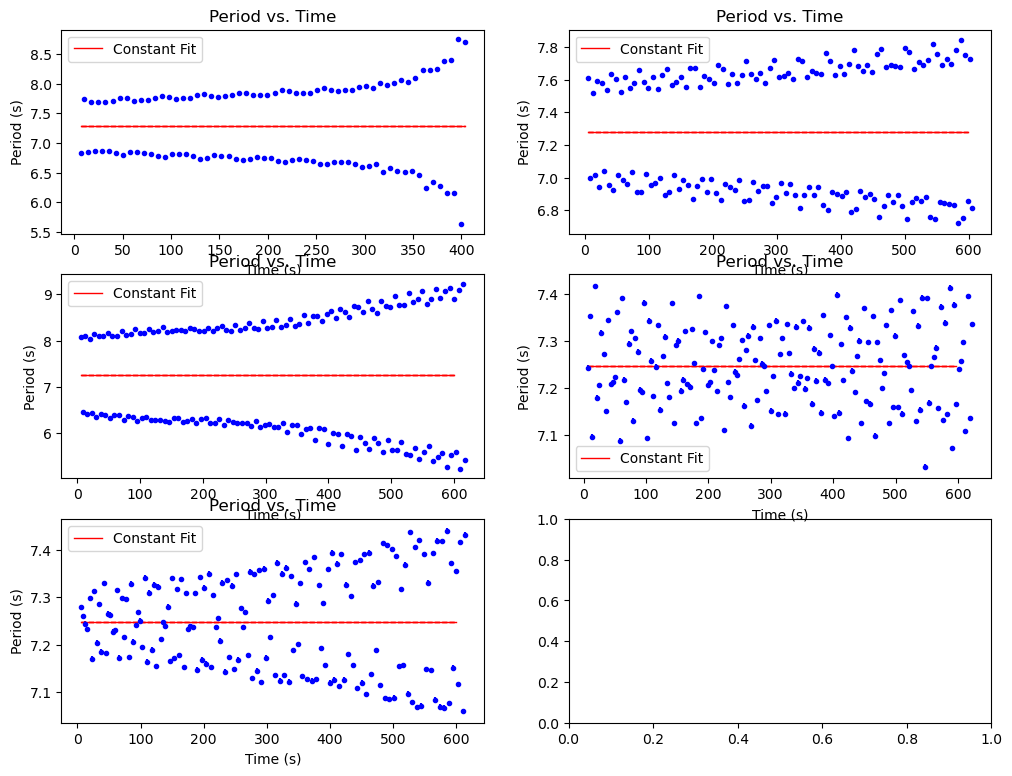

In [3]:
intercept1, dintercept1 = analyze_this("./group2_run1.csv",plot1)
intercept2, dintercept2 = analyze_this("./group2_run2.csv",plot2)
intercept3, dintercept3 = analyze_this("./group2_run3.csv",plot3)
intercept4, dintercept4 = analyze_this("./group2_run4.csv",plot4)
intercept5, dintercept5 = analyze_this("./group2_run5.csv",plot5)

figure

Constant Fit: Coefficients (from curve_fit)
[7.26054036]
Constant Fit: Covariance Matrix (from curve_fit)
[[3.25520835e-08]]

Constant Fit: Final Result: y = (7.26054 +/- 0.00018)



/var/folders/6j/6yws0gl51_d9_70tf51jrx5h0000gr/T/ipykernel_46974/3940864014.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot6 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)


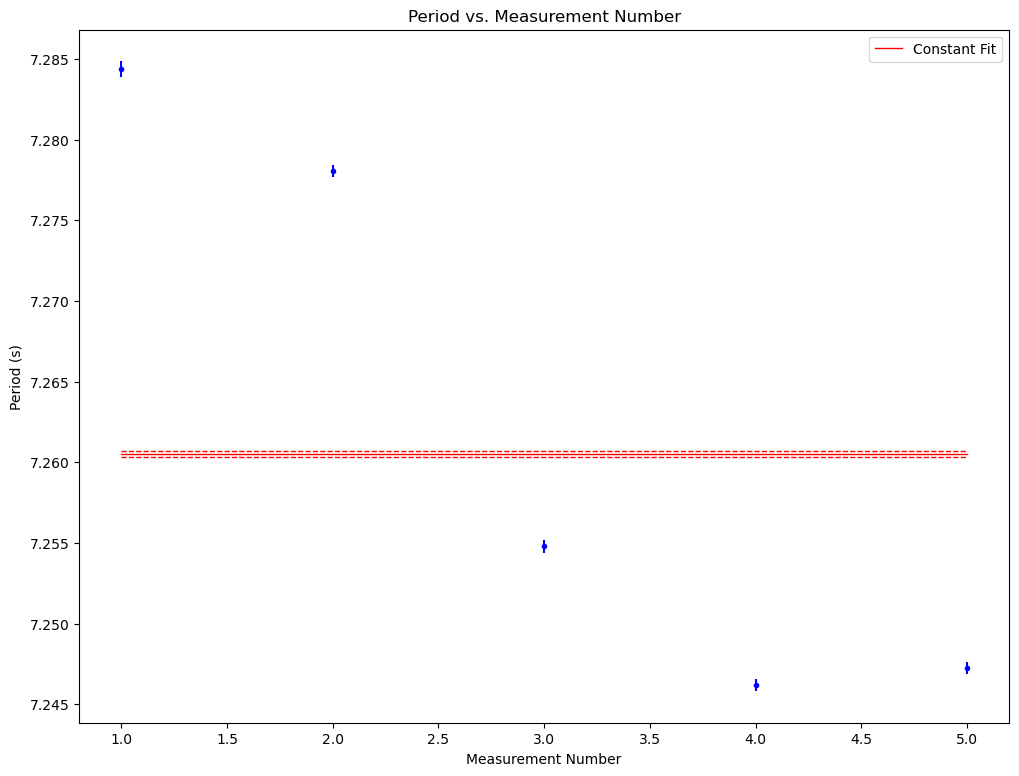

In [4]:
x = np.array([1,2,3,4,5])
dx = np.array([0.00001,0.00001,0.00001,0.00001,0.00001])
y = np.array([intercept1,intercept2,intercept3,intercept4,intercept5])
dy = np.array([dintercept1,dintercept2,dintercept3,dintercept4,dintercept5])

plt.rcParams["figure.figsize"] = (12,9)

figure2, axis2 = plt.subplots(1, 1)
plot6 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

plot6.errorbar(x,y,dy,dx,'b.')

plot6.set_ylabel('Period (s)')
plot6.set_xlabel('Measurement Number')
plot6.set_title('Period vs. Measurement Number')

# Takes the x and y values, with errors in y, and make a constant fit.  The last two parameters are
# the x_low and x_high range to fit over!  This first one is for the entire range.
intercept, dintercept = p201.constant_fit_plot_errors(x,y,dy,plot6)

# Adds the legend to the plot
plot6.legend()
